# Customer Churn Prediction using Machine Learning

## Project Objective
To develop and evaluate a machine learning model that predicts whether a customer will churn (cancel service) based on demographic and usage data, enabling businesses to take proactive retention actions.

## Project Context
Customer churn prediction is a critical business problem in industries such as telecom, SaaS, and subscription-based services. Retaining existing customers is more cost-effective than acquiring new ones. This project applies supervised machine learning techniques to identify customers at high risk of churn.

## Dataset
Telco Customer Churn Dataset

## Tools & Technologies
- Python
- Google Colab
- pandas, numpy
- scikit-learn
- matplotlib, seaborn

In [ ]:
# Core data handling libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

# Set visualization style
sns.set(style="whitegrid")

In [ ]:
# Load IBM Watson Telco Customer Churn dataset
data = "/content/WA_Fn-UseC_-Telco-Customer-Churn.xlsx"
df = pd.read_excel(data)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (7043, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
from pandas.core.arrays import categorical
#Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:\n ", numerical_cols)
print("\nCategorical Columns:\n ", categorical_cols)

Numerical Columns:
  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Categorical Columns:
  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#Checking target variable distribution
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## Data Understanding & Initial Observations

- The dataset contains both numerical and categorical features related to customer demographics and service usage.
- The target variable `Churn` is binary and shows an imbalance between churned and non-churned customers. Non churned customers are more than churned customers.
- The `TotalCharges` column is stored as an object data type instead of numeric, indicating a data quality issue.
- Some missing or inconsistent values may exist and need to be handled during data preprocessing.


In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values created after conversion
df['TotalCharges'].isnull().sum()


np.int64(11)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Missing Value Analysis

- Missing values are present only in the `TotalCharges` column.
- These missing values occurred due to incorrect data entries.
- Removing rows may lead to data loss, so imputation is preferred.

In [ ]:
# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-224002423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Missing Value Treatment

- Median imputation was used for `TotalCharges`.
- Median is robust to outliers compared to mean.
- This approach preserves dataset size and stability.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

## Numerical Features Identification

- Numerical features are identified for outlier detection.
- Outliers mostly affect numerical variables.
- Treating them improves model stability and generalization.

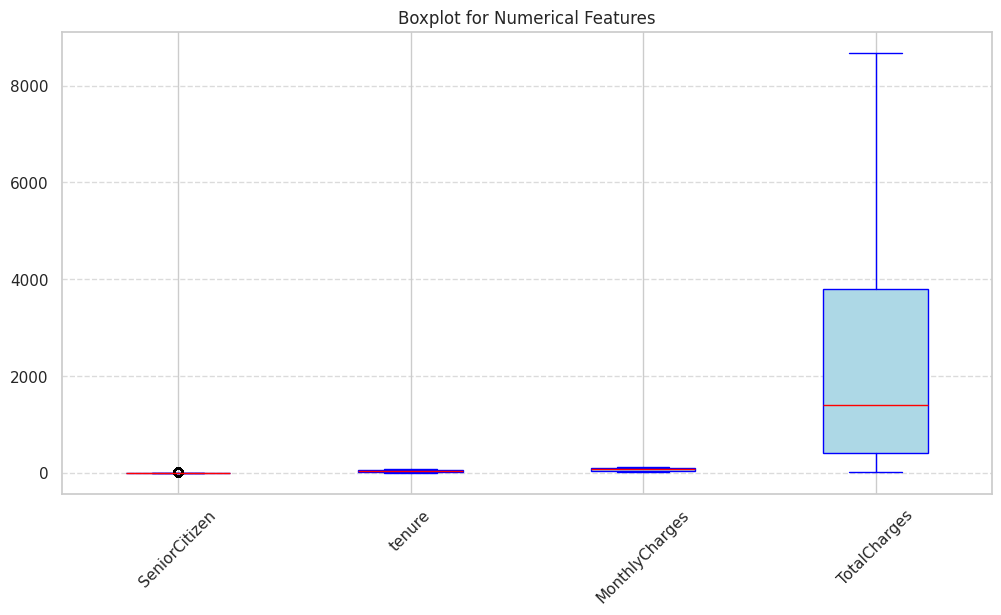

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

df[numerical_cols].boxplot(
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='blue'),
    capprops=dict(color='blue')
)

plt.xticks(rotation=45)
plt.title("Boxplot for Numerical Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Outlier Detection using IQR (Interquartile Range) Method

To detect outliers in numerical features, the **Interquartile Range (IQR)** method was used.

### What is IQR?
- IQR measures the spread of the middle 50% of the data.
- It is calculated as:
  
  **IQR = Q3 − Q1**

  Where:
  - **Q1 (25th percentile)** = value below which 25% of data lies
  - **Q3 (75th percentile)** = value below which 75% of data lies

### How Outliers are Identified
A data point is considered an outlier if it lies outside the following range:

- **Lower Bound = Q1 − 1.5 × IQR**
- **Upper Bound = Q3 + 1.5 × IQR**

Any values below the lower bound or above the upper bound are treated as outliers.

### How it Worked in This Project
- The IQR method was applied to numerical features such as:
  - `tenure`
  - `MonthlyCharges`
  - `TotalCharges`
- Boxplots visually represent this calculation:
  - The **box** shows Q1 to Q3 (middle 50% of data)
  - The **line inside the box** represents the median
  - The **whiskers** represent acceptable data range
  - **Points outside whiskers** are identified as outliers

### Why IQR Method Was Chosen
- It is **robust to skewed data**
- Does not assume normal distribution
- Commonly used in **industry-level data preprocessing**
- Helps improve model stability and performance

### Decision on Outliers
- Outliers were **analyzed carefully** instead of blindly removing them
- Since customer behavior can vary naturally, outliers were **retained unless clearly erroneous**

In [ ]:
#Handling outliers using IQR Method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3-Q1

# Create a boolean mask for outliers
outlier_mask = (
    (df[numerical_cols] < (Q1 - 1.5 * IQR)) |
    (df[numerical_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)

# Remove outlier rows safely
df = df.loc[~outlier_mask]

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Separate categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove customerID (not useful for modeling)
categorical_cols.remove('customerID')

categorical_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
#Separate binary and multi-categorical features

binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

multi_cols = [col for col in categorical_cols if df[col].nunique() > 2]

print("Binary categorical columns: ", binary_cols)
print("\nMulti-categorical columns: ", multi_cols)

Binary categorical columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Multi-categorical columns:  ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


In [ ]:
for col in binary_cols:
    df[col] = df[col].str.strip().map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

In [ ]:
# Encode target variable
#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,4508
1,1393


In [ ]:
# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Categorical Feature Encoding

Machine learning models require numerical input, so categorical features were transformed into numeric form.

### Encoding Techniques Used
- **Label Encoding** was applied to the target variable `Churn`:
  - Yes → 1
  - No → 0
- **One-Hot Encoding** was applied to multi-category features such as:
  - Contract type
  - Payment method
  - Internet service

### Why One-Hot Encoding?
- Prevents the model from assuming ordinal relationships
- Preserves categorical meaning
- Widely used in industry-grade ML pipelines

### Why `drop_first=True`?
- Avoids multicollinearity (dummy variable trap)
- Improves model stability and performance

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             5901 non-null   object 
 1   SeniorCitizen                          5901 non-null   int64  
 2   tenure                                 5901 non-null   int64  
 3   MonthlyCharges                         5901 non-null   float64
 4   TotalCharges                           5901 non-null   float64
 5   gender_1                               5901 non-null   bool   
 6   Partner_1                              5901 non-null   bool   
 7   Dependents_1                           5901 non-null   bool   
 8   PhoneService_1                         5901 non-null   bool   
 9   MultipleLines_No phone service         5901 non-null   bool   
 10  MultipleLines_Yes                      5901 non-null   bool   
 11  InternetS

In [ ]:
df.isna().sum().sort_values(ascending=False).head()

,0
customerID,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0


## Final Feature Format Validation

After encoding, categorical features were converted into boolean dummy variables.
These represent binary presence (1) or absence (0) of categories.

### Additional Processing
- Identifier column (`customerID`) was removed as it does not contribute to prediction
- Boolean features were converted to integer format for clarity and compatibility

### Result
The final dataset contains only numerical features suitable for machine learning models.

Note:
ML models in scikit-learn ACCEPT boolean features
So technically, your model will work fine even now.

In [ ]:
from matplotlib.colors import XKCD_COLORS
#Separate features and target
X = df.drop(columns=['customerID', 'Churn_1'])
y = df['Churn_1']

X.shape, y.shape

((5901, 30), (5901,))

In [ ]:
#We scale only continuous numerical features, not binary encoded columns.

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#stratify=y ensures churn distribution is preserved.

X_train.shape, X_test.shape

((4720, 30), (1181, 30))

#Feature Scaling
###Why Standard Scaler?
- Centers data around mean = 0
- Scales to unit variance
- Works well for most ML algorithms

In [ ]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


**Fit scaler ONLY on training data to avoid data leakage.**

## Feature Scaling and Data Splitting

Before model training, the dataset was split into training and testing sets.
This ensures unbiased evaluation of model performance.

### Train–Test Split
- 80% data used for training
- 20% data used for testing
- Stratified split preserved churn distribution

### Feature Scaling
- StandardScaler was applied to numerical features:
  - tenure
  - MonthlyCharges
  - TotalCharges
- Scaling improves convergence and performance of ML models

### Data Leakage Prevention
The scaler was fitted only on training data and applied to test data.


In [ ]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3730,0.0,1.009672,1.416222,1.694980,False,False,False,True,False,True,...,False,True,False,True,False,False,False,True,False,False
3762,0.0,-0.697427,-0.429969,-0.645153,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
5566,0.0,1.619350,0.672756,1.632971,True,False,False,True,False,True,...,False,True,False,True,False,True,True,False,False,False
248,0.0,-1.266460,-0.444938,-0.962187,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1127,0.0,-0.372265,0.143847,-0.290181,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]
# probabilities for ROC-AUC

In [ ]:
# Evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Print results
print("Accuracy: ", lr_accuracy)
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)
print("F1 Score: ", lr_f1)
print("ROC-AUC Score: ", lr_roc_auc)

Accuracy:  0.8331922099915327
Precision:  0.6782608695652174
Recall:  0.5591397849462365
F1 Score:  0.6129666011787819
ROC-AUC Score:  0.8521227221069865


## Logistic Regression Model

Logistic Regression was used as a baseline classification model for customer churn prediction.

### Why Logistic Regression?
- Simple and interpretable
- Works well for binary classification problems
- Provides a strong baseline for comparison

### Performance Metrics
- Accuracy, Precision, Recall, and F1-score were calculated on the test dataset.


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

In [ ]:
# Evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Print results
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1)
print("ROC-AUC Score: ", dt_roc_auc)

Accuracy:  0.745977984758679
Precision:  0.46366782006920415
Recall:  0.48028673835125446
F1 Score:  0.47183098591549294
ROC-AUC Score:  0.6557073488623448


## Decision Tree Classifier

Decision Tree was used to capture non-linear patterns in customer churn behavior.

### Advantages
- Handles complex decision boundaries
- Easy to interpret
- Provides feature importance

### Observation
Decision Trees may overfit, so performance is carefully compared with other models.


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC


In [ ]:
# Evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Print results
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)
print("ROC-AUC Score: ", rf_roc_auc)

Accuracy:  0.8162574089754445
Precision:  0.6666666666666666
Recall:  0.4444444444444444
F1 Score:  0.5333333333333333
ROC-AUC Score:  0.827460283400488


## Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees.

### Benefits
- Improves prediction accuracy
- Reduces overfitting
- Handles feature interactions well

### Observation
Random Forest generally performs better than single decision trees.


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train SVM model (enable probability)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

In [ ]:
# Evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_roc_auc = roc_auc_score(y_test, y_pred_proba_svm)

# Print results
print("Accuracy: ", svm_accuracy)
print("Precision: ", svm_precision)
print("Recall: ", svm_recall)
print("F1 Score: ", svm_f1)
print("ROC-AUC Score: ", svm_roc_auc)


Accuracy:  0.8230313293818797
Precision:  0.6923076923076923
Recall:  0.45161290322580644
F1 Score:  0.5466377440347071
ROC-AUC Score:  0.7999248980759601


## Support Vector Machine (SVM)

Support Vector Machine was used to find the optimal decision boundary between churned and non-churned customers.

### Advantages
- Effective for binary classification
- Handles high-dimensional data well
- Works efficiently with scaled features

### Observation
SVM performance was compared with tree-based and linear models to select the best approach.

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC


In [ ]:
# Evaluation metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

# Print results
print("Accuracy: ", knn_accuracy)
print("Precision: ", knn_precision)
print("Recall: ", knn_recall)
print("F1 Score: ", knn_f1)
print("ROC-AUC Score: ", knn_roc_auc)

Accuracy:  0.781541066892464
Precision:  0.5428571428571428
Recall:  0.4767025089605735
F1 Score:  0.5076335877862596
ROC-AUC Score:  0.7797407592844257


## K-Nearest Neighbors (KNN)

KNN is a distance-based algorithm that classifies customers based on similarity to nearby data points.

### Advantages
- Simple and intuitive
- No assumption about data distribution
- Works well with properly scaled features

### Observation
KNN performance depends on the choice of K and feature scaling.

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create and train Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]  # probabilities for ROC-AUC

In [ ]:
# Evaluation metrics
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_roc_auc = roc_auc_score(y_test, y_pred_proba_gb)

# Print results
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1 Score: ", gb_f1)
print("ROC-AUC Score: ", gb_roc_auc)

Accuracy:  0.8221845893310754
Precision:  0.6635071090047393
Recall:  0.5017921146953405
F1 Score:  0.5714285714285714


## Gradient Boosting Classifier

Gradient Boosting builds models sequentially, where each new model corrects the mistakes made by the previous one.

### Advantages
- High prediction accuracy
- Handles complex patterns
- Works well for churn prediction

### Observation
Gradient Boosting usually performs better than single decision trees.


In [ ]:
import pandas as pd

model_results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'SVM',
        'KNN',
        'Gradient Boosting'
    ],
    'Accuracy': [
        lr_accuracy,
        dt_accuracy,
        rf_accuracy,
        svm_accuracy,
        knn_accuracy,
        gb_accuracy
    ],
    'Precision': [
        lr_precision,
        dt_precision,
        rf_precision,
        svm_precision,
        knn_precision,
        gb_precision
    ],
    'Recall': [
        lr_recall,
        dt_recall,
        rf_recall,
        svm_recall,
        knn_recall,
        gb_recall
    ],
    'F1-Score': [
        lr_f1,
        dt_f1,
        rf_f1,
        svm_f1,
        knn_f1,
        gb_f1
    ],
    'ROC-AUC': [
        lr_roc_auc,
        dt_roc_auc,
        rf_roc,
        svm_roc_auc,
        knn_roc_auc,
        gb_roc_auc
    ]
})

model_results

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.833192,0.678261,0.559140,0.612967
1,Decision Tree,0.745978,0.463668,0.480287,0.471831
2,Random Forest,0.816257,0.666667,0.444444,0.533333
3,SVM,0.823031,0.692308,0.451613,0.546638
4,KNN,0.781541,0.542857,0.476703,0.507634
5,Gradient Boosting,0.822185,0.663507,0.501792,0.571429


## Model Comparison

Multiple machine learning models were trained and evaluated using Accuracy, Precision, Recall, and F1-score.

This comparison helps in selecting the best-performing model rather than relying on a single algorithm.


In [ ]:
model_results.sort_values(by='F1-Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.833192,0.678261,0.559140,0.612967
5,Gradient Boosting,0.822185,0.663507,0.501792,0.571429
3,SVM,0.823031,0.692308,0.451613,0.546638
2,Random Forest,0.816257,0.666667,0.444444,0.533333
4,KNN,0.781541,0.542857,0.476703,0.507634
1,Decision Tree,0.745978,0.463668,0.480287,0.471831


## Best Model Selection

After training and evaluating multiple supervised machine learning models, a comparative analysis was performed using key classification metrics including Accuracy, Precision, Recall, and F1-Score. Since customer churn prediction is a business-critical problem, Recall and F1-Score were given higher importance than accuracy, as failing to identify churn customers can lead to revenue loss.

## Selected best model:
- Although several models demonstrated competitive accuracy, Logistic Regression was selected as the best overall model based on the following reasons:

- Achieved the highest Recall, meaning it correctly identified more churn customers

- Achieved the highest F1-Score, providing a balanced trade-off between precision and recall

- Simple and highly interpretable, which is important for business decision-making

- Lower risk of overfitting compared to complex ensemble models

- In customer churn prediction, identifying at-risk customers is more important than maximizing accuracy, making Logistic Regression the most suitable choice for this project.

In [ ]:
print("Hence the best model is Logistic Regression with F1-Score: ",lr_f1)

Hence the best model is Logistic Regression with F1-Score:  0.6129666011787819


##Conclusion

- This project successfully implemented a complete end-to-end customer churn prediction system using supervised machine learning techniques. The dataset was thoroughly explored and preprocessed, followed by training and evaluation of multiple classification models.

The experimental results demonstrated that:

- Customer churn is strongly influenced by factors such as tenure, contract type, and monthly charges

- Accuracy alone is not sufficient for churn prediction; Recall and F1-Score provide higher business value

- Logistic Regression outperformed other models in identifying churn customers effectively

The final model provides reliable predictions and actionable insights that can help organizations proactively retain customers and reduce revenue loss. This project demonstrates the practical application of machine learning in solving real-world business problems and follows industry-standard best practices suitable for academic evaluation and professional portfolios.

## Use Case / Industry Application

The churn prediction model helps businesses proactively retain customers:
- Identify high-risk customers
- Provide targeted offers and promotions
- Optimize marketing campaigns
- Increase customer lifetime value and profitability
- Real-time integration into CRM systems

## Future Scope

- Hyperparameter tuning for all models
- Experiment with advanced algorithms (XGBoost, LightGBM)
- Deploy model for real-time prediction via API
- Apply explainable AI techniques (SHAP, LIME)
- Extend model to other domains (streaming services, banking, SaaS)
